# Import libraries

In [ ]:
#potential resources
# https://blog.data.nasdaq.com/api-for-interest-rate-data
# https://api-ninjas.com/api/interestrate
# https://data.oecd.org/interest/long-term-interest-rates.htm

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import PyPDF2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import requests

# Define the API endpoint
api_url = "https://api.api-ninjas.com/v1/interestrate"

# Define the headers for the API request
key = 'QjuPz1UUafFgZrrj+hOaog==jks4hAXt1kivxWFS'

headers = {
    'X-Api-Key': key  # replace 'YOUR_API_KEY' with your actual API key
}

# Define the parameters for the API request
params = {
    'country': 'Denmark'  # replace 'Mexico' with 'Switzerland' to get Swiss rates
}

# Make the API request
response = requests.get(api_url, headers=headers, params=params)

# Check the response
if response.status_code == 200:
    print(response.json())
else:
    print("Error:", response.status_code, response.text)


{'central_bank_rates': [{'central_bank': 'Danish Central Bank', 'country': 'Denmark', 'rate_pct': 3.75, 'last_updated': '09-15-2023'}], 'non_central_bank_rates': [{'name': 'Euribor - 1 week', 'rate_pct': 3.899, 'last_updated': '02-23-2024'}, {'name': 'USD LIBOR - overnight', 'rate_pct': 5.06157, 'last_updated': '06-30-2023'}, {'name': 'ESTER', 'rate_pct': 3.909, 'last_updated': '02-22-2024'}, {'name': 'SARON', 'rate_pct': 1.692129, 'last_updated': '02-22-2024'}, {'name': 'SONIA', 'rate_pct': 5.188, 'last_updated': '02-21-2024'}, {'name': 'TONAR', 'rate_pct': -0.006, 'last_updated': '02-21-2024'}]}


In [7]:
import requests
key = 'QjuPz1UUafFgZrrj+hOaog==jks4hAXt1kivxWFS'
api_url = 'https://api.api-ninjas.com/v1/interestrate'
response = requests.get(api_url, headers={'X-Api-Key': key})
if response.status_code == requests.codes.ok:
    print(response.text)
else:
    print("Error:", response.status_code, response.text)

{"central_bank_rates": [{"central_bank": "Australian Central Bank", "country": "Australia", "rate_pct": 4.35, "last_updated": "11-08-2023"}, {"central_bank": "British Central Bank", "country": "United Kingdom", "rate_pct": 5.25, "last_updated": "08-03-2023"}, {"central_bank": "Chilean Central Bank", "country": "Chile", "rate_pct": 7.25, "last_updated": "02-01-2024"}, {"central_bank": "Chinese Central Bank", "country": "China", "rate_pct": 3.45, "last_updated": "08-21-2023"}, {"central_bank": "Czech Central Bank", "country": "Czech Republic", "rate_pct": 6.25, "last_updated": "02-08-2024"}, {"central_bank": "Danish Central Bank", "country": "Denmark", "rate_pct": 3.75, "last_updated": "09-15-2023"}, {"central_bank": "Mexican Central Bank", "country": "Mexico", "rate_pct": 11.25, "last_updated": "03-30-2023"}, {"central_bank": "New Zealand Central Bank", "country": "New Zealand", "rate_pct": 5.5, "last_updated": "05-24-2023"}, {"central_bank": "Norwegian Central Bank", "country": "Norway

In [12]:
import requests
from datetime import datetime, timedelta

key = 'QjuPz1UUafFgZrrj+hOaog==jks4hAXt1kivxWFS'
api_url = 'https://api.api-ninjas.com/v1/interestrate'

response = requests.get(api_url, headers={'X-Api-Key': key})
if response.status_code == requests.codes.ok:
    data = response.json()
    # Get the current date
    current_date = datetime.now()
    # Calculate the date two years ago from today
    two_years_ago = current_date - timedelta(days=2*365)
    
    # Filter the data for the last two years
    filtered_central_bank_rates = [item for item in data['central_bank_rates'] if datetime.strptime(item['last_updated'], '%m-%d-%Y') >= two_years_ago]
    filtered_non_central_bank_rates = [item for item in data['non_central_bank_rates'] if datetime.strptime(item['last_updated'], '%m-%d-%Y') >= two_years_ago]
    
    print("Filtered Central Bank Rates:", filtered_central_bank_rates)
    print("Filtered Non-Central Bank Rates:", filtered_non_central_bank_rates)
else:
    print("Error:", response.status_code, response.text)



Filtered Central Bank Rates: [{'central_bank': 'Australian Central Bank', 'country': 'Australia', 'rate_pct': 4.35, 'last_updated': '11-08-2023'}, {'central_bank': 'British Central Bank', 'country': 'United Kingdom', 'rate_pct': 5.25, 'last_updated': '08-03-2023'}, {'central_bank': 'Chilean Central Bank', 'country': 'Chile', 'rate_pct': 7.25, 'last_updated': '02-01-2024'}, {'central_bank': 'Chinese Central Bank', 'country': 'China', 'rate_pct': 3.45, 'last_updated': '08-21-2023'}, {'central_bank': 'Czech Central Bank', 'country': 'Czech Republic', 'rate_pct': 6.25, 'last_updated': '02-08-2024'}, {'central_bank': 'Danish Central Bank', 'country': 'Denmark', 'rate_pct': 3.75, 'last_updated': '09-15-2023'}, {'central_bank': 'Mexican Central Bank', 'country': 'Mexico', 'rate_pct': 11.25, 'last_updated': '03-30-2023'}, {'central_bank': 'New Zealand Central Bank', 'country': 'New Zealand', 'rate_pct': 5.5, 'last_updated': '05-24-2023'}, {'central_bank': 'Norwegian Central Bank', 'country': '

# Load data

In [2]:
import os
import PyPDF2
from datetime import datetime

# Specify the folder
folder = './speaches'

# Get a list of all files in the folder
files = os.listdir(folder)

# Filter the list for PDF files
pdf_files = [file for file in files if file.endswith('.pdf')]

# Iterate over the PDF files
for pdf_file in pdf_files:
    # Extract the date from the filename
    country, date_str = pdf_file.split('_')[0], pdf_file.split('_')[1]  # This assumes the date is always at the same position in the filename

    
    try:
        date_str = date_str.split('.')[0] # This assumes the date is always
        date = datetime.strptime(date_str, '%y%m%d')  # Convert the date string to a datetime object
    except ValueError:
        print(f"Error: The date string {date_str} from {pdf_file} does not match the format '%y%m%d'")
    # Open the PDF file
    with open(os.path.join(folder, pdf_file), 'rb') as file:
        # Create a PDF reader object
        pdf_reader = PyPDF2.PdfReader(file)

        # Read the content of the PDF
        content = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            content += page.extract_text()

        # Now you can use the content of the PDF and the date as you wish


Error: The date string r231023h from India_r231023h.pdf does not match the format '%y%m%d'
Error: The date string r221118 from Japan_r221118.pdf does not match the format '%y%m%d'
Error: The date string 231115i from Switzerland_231115i.pdf does not match the format '%y%m%d'
Error: The date string and from Topology_and_rates.pdf does not match the format '%y%m%d'
Error: The date string 231115m from USA_231115m.pdf does not match the format '%y%m%d'


In [3]:


# Initialize an empty dictionary to hold the dataframes
dfs = {}

for pdf_file in os.listdir(folder):
    # Extract the country and date from the filename
    country, date_str = pdf_file.split('_')[0], pdf_file.split('_')[1]

    # Remove the file extension from the date string
    date_str = date_str.split('.')[0]

    try:
        # Convert the date string to a datetime object
        date = datetime.strptime(date_str, '%y%m%d')
    except ValueError:
        print(f"Error: The date string {date_str} from {pdf_file} does not match the format '%y%m%d'")
        continue

    # Open the PDF file
    with open(os.path.join(folder, pdf_file), 'rb') as file:
        # Create a PDF reader object
        pdf_reader = PyPDF2.PdfReader(file)

        # Read the content of the PDF
        content = ''
        page_counter = 0
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            content += page.extract_text()
            page_counter += 1
            if page_counter % 2==0:
                date += timedelta(minutes=1)

        # If the country is not in the dictionary, add it
        if country not in dfs:
            dfs[country] = pd.DataFrame(columns=['content'])

        # Add the content of the PDF to the dataframe
        dfs[country].loc[date] = content
        
for country, df in dfs.items():
    df.to_parquet(f'fed_statements/{country.lower()}.parquet')

Error: The date string 231023h from India_231023h.pdf does not match the format '%y%m%d'
Error: The date string and from Topology_and_rates.pdf does not match the format '%y%m%d'


In [8]:
import pandas as pd
import os
from datetime import datetime, timedelta
import PyPDF2

dfs = {}
folder = './speaches'

# Initialize an empty dictionary to hold the dataframes
dfs = {}

for pdf_file in os.listdir(folder):
    # Extract the country and date from the filename
    country, date_str = pdf_file.split('_')[0], pdf_file.split('_')[1]

    # Remove the file extension from the date string
    date_str = date_str.split('.')[0]

    try:
        # Convert the date string to a datetime object
        date = datetime.strptime(date_str, '%y%m%d')
    except ValueError:
        print(f"Error: The date string {date_str} from {pdf_file} does not match the format '%y%m%d'")
        continue

    # Open the PDF file
    with open(os.path.join(folder, pdf_file), 'rb') as file:
        # Create a PDF reader object
        pdf_reader = PyPDF2.PdfReader(file)

        # Read the content of the PDF
        content = ''
        page_counter = 0
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            content += page.extract_text()
            page_counter += 1
            if page_counter % 2==0:
                date += timedelta(minutes=1)

        # If the country is not in the dictionary, add it
        if country not in dfs:
            dfs[country] = pd.DataFrame(columns=['content'])

        # Add the content of the PDF to the dataframe
        dfs[country].loc[date] = content
        
for country, df in dfs.items():
    df.to_parquet(f'fed_statements/{country.lower()}.parquet')


Error: The date string 231023h from India_231023h.pdf does not match the format '%y%m%d'
Error: The date string and from Topology_and_rates.pdf does not match the format '%y%m%d'


In [8]:
regimes = pd.read_parquet('quarterly_data/df_2020Q1.parquet')
regimes['labels']
countries = regimes[regimes['labels'] == 0].index.tolist()

In [9]:
import re
dfs = []
# Iterate over the countries
for country in countries:
    # Read the Parquet file into a DataFrame
    if country == 'uk':
        country = 'england'
    if country == 'south korea':
        country = 'korea'
    df = pd.read_parquet(f"fed_statements2/{country}.parquet")
    df = df.map(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)) if isinstance(x, str) else x)
    
    # Add the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames along the row axis
regime_0 = pd.concat(dfs, axis=0)

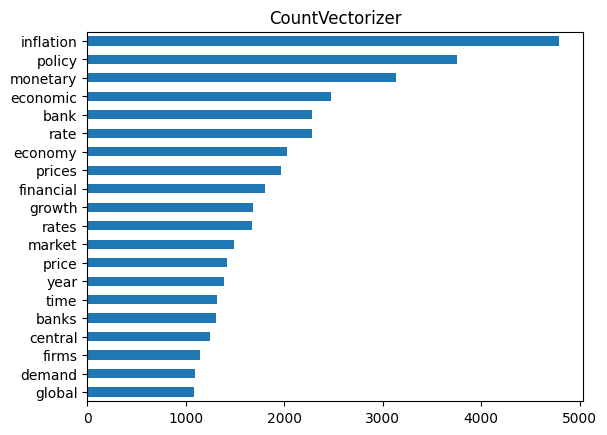

In [10]:
stops = list(CountVectorizer(stop_words="english").get_stop_words())
cvec = CountVectorizer(stop_words=stops)
text_cvec = cvec.fit_transform(regime_0["content"])

cvec_df = pd.DataFrame(text_cvec.todense(), columns=cvec.get_feature_names_out())
cvec_df.sum().sort_values().tail(20).plot(kind="barh", title="Word Count");

In [13]:
import re
dfs = []
# Iterate over the countries
for country in ['india']:
    # Read the Parquet file into a DataFrame   
    df = pd.read_parquet(f"fed_statements/{country}.parquet")
    df = df.map(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)) if isinstance(x, str) else x)
    
    # Add the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames along the row axis
regime_1 = pd.concat(dfs, axis=0)

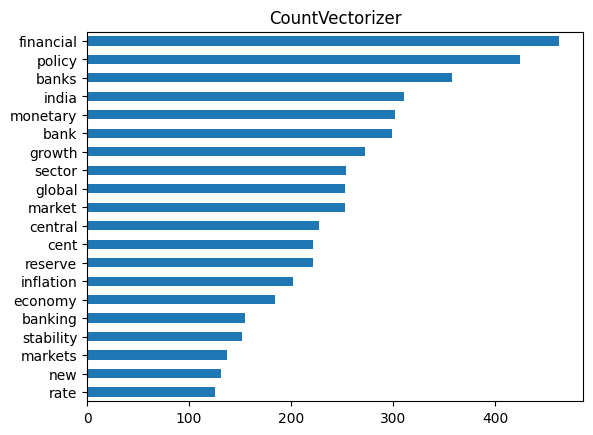

In [14]:
stops = list(CountVectorizer(stop_words="english").get_stop_words())
cvec = CountVectorizer(stop_words=stops)
text_cvec = cvec.fit_transform(regime_1["content"])

cvec_df = pd.DataFrame(text_cvec.todense(), columns=cvec.get_feature_names_out())
cvec_df.sum().sort_values().tail(20).plot(kind="barh", title="CountVectorizer");

In [9]:
X_train, X_test, y_train, y_test = train_test_split(articles, labels, random_state = 42, test_size = 0.2,
                                                    stratify = labels)

In [10]:
print(len(X_train), len(X_test))

1780 445


# Tokenization and word indexing

In [15]:
# Define some variables
vocab_size = 5000 # max number of words
embedding_dim = 64 # This is the dimension of the Word Vector
max_length = 200 # maximum length of the sequence
trunc_type = 'post' # where to chop off
padding_type = 'post' # where to put the padding
oov_token = '<OOV>'


In [16]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_token)

In [17]:
tokenizer.fit_on_texts(regime_0["content"])

In [18]:
tokenizer.word_index

{'<OOV>': 1,
 'i': 2,
 'the': 3,
 'of': 4,
 'to': 5,
 'and': 6,
 'in': 7,
 'a': 8,
 'is': 9,
 'that': 10,
 'for': 11,
 'on': 12,
 'inflation': 13,
 'as': 14,
 'are': 15,
 'this': 16,
 'we': 17,
 'policy': 18,
 'will': 19,
 'have': 20,
 'by': 21,
 'at': 22,
 'has': 23,
 'with': 24,
 'be': 25,
 'our': 26,
 'monetary': 27,
 'it': 28,
 'economic': 29,
 'rate': 30,
 'bank': 31,
 'from': 32,
 'economy': 33,
 'prices': 34,
 'been': 35,
 'also': 36,
 'financial': 37,
 'e': 38,
 'growth': 39,
 'rates': 40,
 'an': 41,
 'not': 42,
 'which': 43,
 'market': 44,
 'more': 45,
 'but': 46,
 'these': 47,
 'price': 48,
 'interest': 49,
 'year': 50,
 'over': 51,
 'time': 52,
 'banks': 53,
 'central': 54,
 'was': 55,
 'than': 56,
 't': 57,
 'their': 58,
 'would': 59,
 'per': 60,
 'firms': 61,
 'its': 62,
 'there': 63,
 'demand': 64,
 'some': 65,
 'global': 66,
 'outlook': 67,
 'or': 68,
 'y': 69,
 'pandemic': 70,
 'euro': 71,
 's': 72,
 'high': 73,
 'conditions': 74,
 'target': 75,
 'cent': 76,
 'can': 77,

# Convert words to number

In [19]:
train_seq = tokenizer.texts_to_sequences(regime_0["content"])

In [21]:
train_seq[10]

[1560,
 538,
 1245,
 981,
 2432,
 2370,
 12,
 3,
 70,
 139,
 1029,
 665,
 21,
 934,
 1560,
 538,
 1245,
 1309,
 4,
 3,
 142,
 4,
 839,
 4,
 3,
 219,
 138,
 149,
 22,
 981,
 2432,
 2370,
 12,
 3,
 70,
 139,
 2661,
 21,
 3,
 142,
 4,
 839,
 4,
 3,
 219,
 138,
 149,
 1109,
 2045,
 782,
 1924,
 345,
 1611,
 278,
 115,
 259,
 17,
 762,
 1279,
 981,
 2432,
 1097,
 128,
 3,
 564,
 3,
 427,
 23,
 2990,
 5,
 25,
 247,
 45,
 2671,
 56,
 17,
 116,
 20,
 1,
 62,
 1644,
 2440,
 55,
 5,
 1,
 753,
 2444,
 14,
 336,
 4,
 26,
 27,
 18,
 415,
 322,
 159,
 3,
 981,
 23,
 228,
 3536,
 1069,
 4667,
 14,
 8,
 1860,
 336,
 4,
 26,
 29,
 1278,
 6,
 47,
 1310,
 20,
 2445,
 88,
 536,
 10,
 981,
 2432,
 23,
 2969,
 5,
 3092,
 3,
 78,
 1017,
 1,
 4,
 26,
 4667,
 310,
 47,
 1097,
 2523,
 110,
 5,
 1830,
 941,
 32,
 200,
 12,
 3,
 2451,
 22,
 3,
 3356,
 4,
 3,
 410,
 6,
 757,
 127,
 1854,
 32,
 1492,
 273,
 3,
 564,
 5,
 1754,
 1,
 1,
 6,
 614,
 4381,
 5,
 3,
 2840,
 29,
 1,
 47,
 2147,
 15,
 441,
 2671,
 14,
 17,


In [21]:
print(train_seq[10])

[1821, 3363, 3238, 1, 422, 1821, 3363, 2482, 1, 8, 294, 263, 1411, 87, 4276, 4483, 1, 1, 1066, 5, 105, 36, 1229, 1895, 630, 42, 1, 4725, 2760, 1718, 1523, 416, 419, 739, 162, 408, 1411, 1, 1, 1, 1186, 2, 1821, 3363, 3239, 6, 1, 3629, 65, 347, 3030, 1319, 1003, 58, 12, 5, 1, 1, 1, 1935, 230, 103, 2, 724, 4097, 135, 1, 1392, 1, 2928, 2055, 1, 54, 2105, 1, 57, 80, 2699, 444, 201, 240, 73, 104, 1025, 1, 3030, 146, 1821, 3363, 54, 2483, 1, 1320, 958, 2242, 180, 49, 1566, 1, 27, 2153, 180, 364, 457, 2547, 1, 850, 41, 1566, 740, 2617, 1, 207, 180]
